# Visualizations of the electricity consumption - EU founding countries / US

## Sources

- US: https://www.eia.gov/electricity
- EU founding countries:https://ec.europa.eu/eurostat/databrowser/explore/all

## Remarks

Further calculations were required for the US data. Data for electricity consumption are only given separately for each source used to generate electricity.

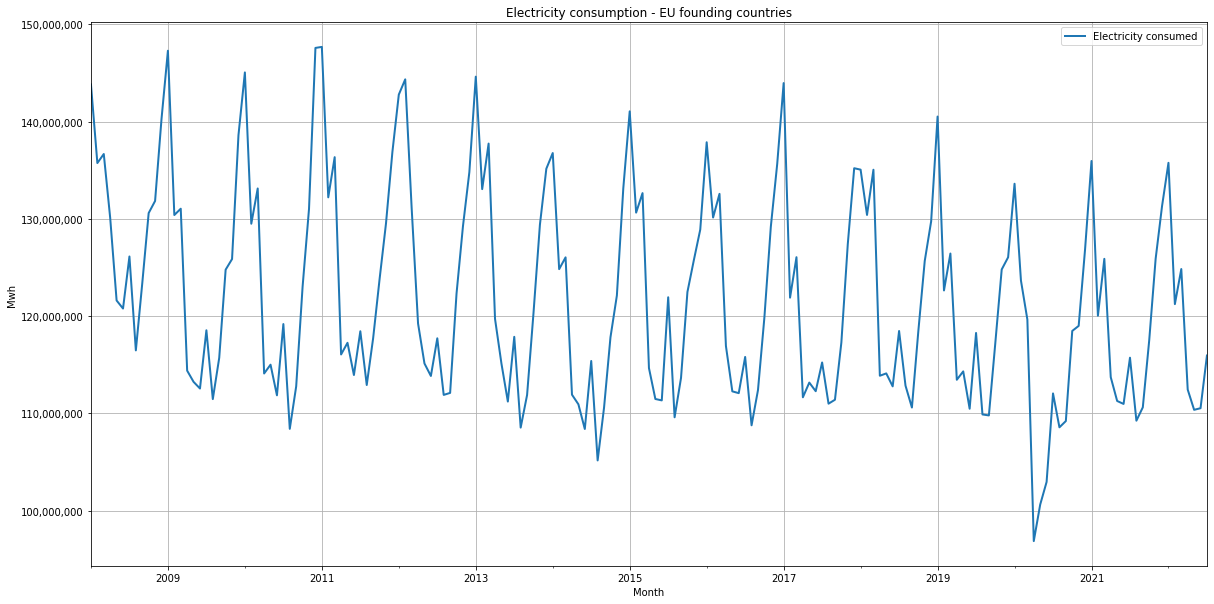

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime
import statsmodels.api as sm


data = pd.read_csv("/Users/xxx/Documents/Daten/ei_isen_m__custom_4619346_linear.csv", parse_dates=["TIME_PERIOD"])
data.index = data["geo"]

founders = ['BE', 'DE', 'FR', 'IT', 'LU', 'NL']
countries = []

# Splitting the DataFrame in smaller DataFrames
for country in founders:
    countries.append(data.filter(like=country, axis=0)
                     [['TIME_PERIOD', 'OBS_VALUE']]
                     .set_index('TIME_PERIOD'))

# pd.concat creates one dataframe but does not sum values up, that have the same index value
df_all = pd.concat(countries, axis=0)

# Grouping all rows by their same value - in this case the same month - then summing all value of one month
df_all = df_all.groupby('TIME_PERIOD').sum() * 1000  # Unit correction GWh in MWh

# plotting the DataFrame for the EU founding countries
ax1 = df_all[:'2022-07-31'].rename(columns={"OBS_VALUE": "Electricity consumed"}).plot(figsize=(20, 10),
                                 grid=True,
                                 title='Electricity consumption - EU founding countries',
                                 linewidth=2.0)

ax1.set_xlabel('Month')
ax1.set_ylabel('Mwh')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));


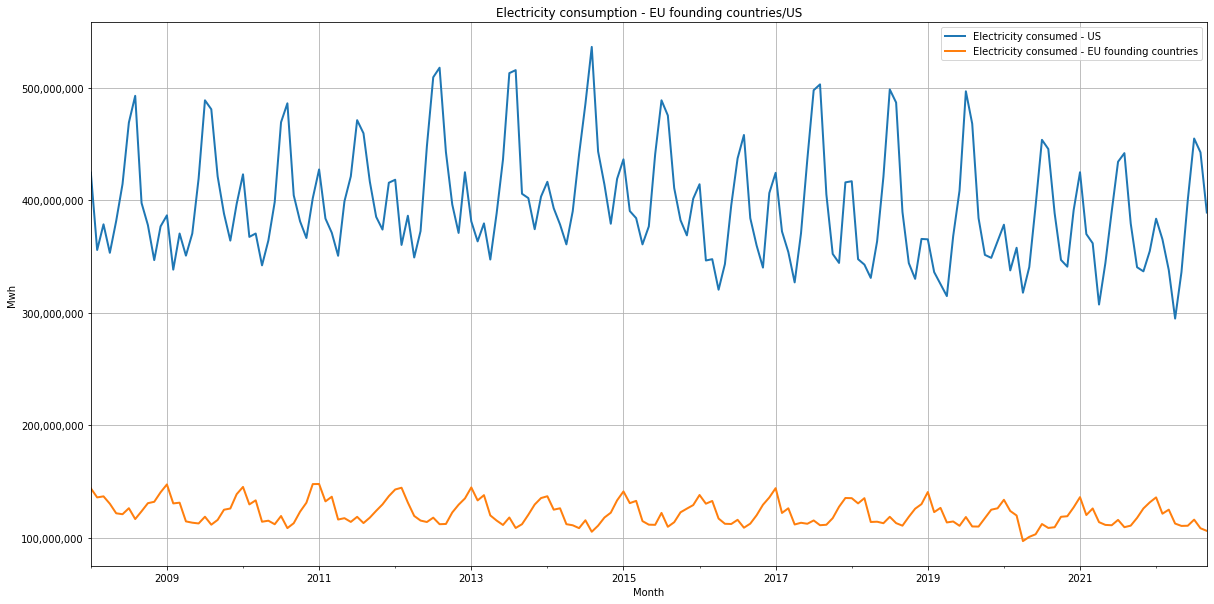

In [2]:
data_us = pd.read_excel('/Users/xxx/Documents/Daten/Electricity consumption - gas and coal only.xlsx')

# Excluding values that are not available in the US data
data_us.index = df_all[:'2022-09-30'].index

# Adding the values of EU6 to the US DataFrame
data_us["Electricity consumed - EU founding countries"] = df_all["OBS_VALUE"]

# Removing the old date column from the US data as there was a problem transforming it to datetime aswell
data_us.drop(columns=['date'])


# Storing the figure created by pandas in ax and renaming the columns of the dataframe
# Then plotting the dataframe + formatting
ax =data_us.rename(columns={"Electricity consumed (in Mwh)": "Electricity consumed - US"}).plot(
    figsize=(20,10),
    grid=True,
    title='Electricity consumption - EU founding countries/US',
    linewidth=2.0)

ax.set_xlabel('Month')
ax.set_ylabel('Mwh')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
matplotlib.pyplot.rcParams.update({'font.size': 17})


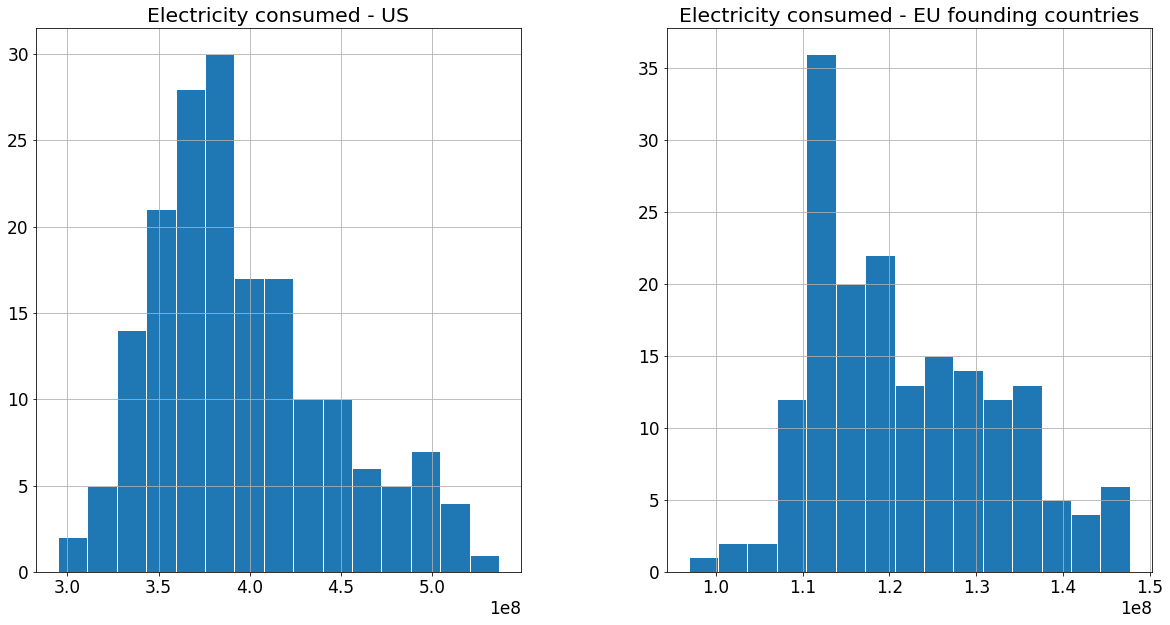

In [3]:
data_us.rename(columns={"Electricity consumed (in Mwh)": "Electricity consumed - US"}).hist(figsize=(20,10),
                                                                                           bins=15,
                                                                                           edgecolor="white",
                                                                                           color="tab:blue");

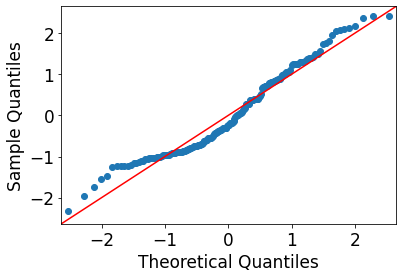

In [4]:
sm.qqplot(data_us['Electricity consumed - EU founding countries'].values, line='45', fit=True)
matplotlib.pyplot.rcParams["figure.figsize"] = (10,5)